<a href="https://colab.research.google.com/github/Afyana/Infant_mortality_analysis/blob/main/Infant_Mortality_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1>
**Leveraging World Bank Data to Model and Forecast Infant Mortality in Ethiopia: A Comparative Study with East African Nations**<h1/>


<h2>
Load data and Import Libraries </h2>

In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#Load the data that is stored in Google Drive
from google.colab import drive
drive.mount('/content/drive')
df= pd.read_csv('/content/drive/MyDrive/infant_mortality_project /data /world bank project/Data.csv')
df.head()

Mounted at /content/drive


,Country Name,Country Code,Series Name,Series Code,1990 [YR1990],1991 [YR1991],1992 [YR1992],1993 [YR1993],1994 [YR1994],1995 [YR1995],...,2013 [YR2013],2014 [YR2014],2015 [YR2015],2016 [YR2016],2017 [YR2017],2018 [YR2018],2019 [YR2019],2020 [YR2020],2021 [YR2021],2022 [YR2022]
0,Ethiopia,ETH,"Immunization, DPT (% of children ages 12-23 mo...",SH.IMM.IDPT,49.000,21.000,13.000,28.000,57.000,57.000,...,59.000,61.000,62.000,64.000,65.000,62.000,61.000,62.000,63.00,63.000
1,Ethiopia,ETH,"Immunization, measles (% of children ages 12-2...",SH.IMM.MEAS,38.000,17.000,12.000,22.000,54.000,38.000,...,55.000,54.000,56.000,57.000,59.000,54.000,56.000,57.000,60.00,62.000
2,Ethiopia,ETH,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,45.117,46.657,47.279,47.676,47.926,48.156,...,62.161,62.927,63.592,64.162,64.766,65.257,65.741,65.969,65.33,66.897
3,Ethiopia,ETH,"Maternal mortality ratio (modeled estimate, pe...",SH.STA.MMRT,1320.000,1239.000,1218.000,1168.000,1113.000,1060.000,...,494.000,444.000,401.000,364.000,327.000,297.000,269.000,244.000,250.00,207.000
4,Ethiopia,ETH,"Mortality rate, infant (per 1,000 live births)",SP.DYN.IMRT.IN,126.700,123.900,120.800,117.400,113.800,110.000,...,52.200,50.100,48.000,46.000,44.200,42.500,41.000,39.600,38.30,37.000


<h2>
Data Cleaning and Transformation </h2>

In [2]:
# Understanding the data
df.info()
df.describe()
df.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 37 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Country Name   32 non-null     object 
 1   Country Code   30 non-null     object 
 2   Series Name    30 non-null     object 
 3   Series Code    30 non-null     object 
 4   1990 [YR1990]  30 non-null     float64
 5   1991 [YR1991]  30 non-null     float64
 6   1992 [YR1992]  30 non-null     float64
 7   1993 [YR1993]  30 non-null     float64
 8   1994 [YR1994]  30 non-null     float64
 9   1995 [YR1995]  30 non-null     float64
 10  1996 [YR1996]  30 non-null     float64
 11  1997 [YR1997]  30 non-null     float64
 12  1998 [YR1998]  30 non-null     float64
 13  1999 [YR1999]  30 non-null     float64
 14  2000 [YR2000]  30 non-null     float64
 15  2001 [YR2001]  30 non-null     float64
 16  2002 [YR2002]  30 non-null     float64
 17  2003 [YR2003]  30 non-null     float64
 18  2004 [YR2004

,0
Country Name,3
Country Code,5
Series Name,5
Series Code,5
1990 [YR1990],5
1991 [YR1991],5
1992 [YR1992],5
1993 [YR1993],5
1994 [YR1994],5
1995 [YR1995],5


In [3]:
#handling missing values
df= df.ffill().bfill()
df.isna().sum()

,0
Country Name,0
Country Code,0
Series Name,0
Series Code,0
1990 [YR1990],0
1991 [YR1991],0
1992 [YR1992],0
1993 [YR1993],0
1994 [YR1994],0
1995 [YR1995],0


In [4]:
# Check column names since World Bank datasets often have messy column names
df.columns
# Remove spaces from column names
df.columns = df.columns.str.replace(' ', '_')

In [5]:
# Check for duplicate data since it is crucial in data analysis
df.duplicated().sum()
# Remove duplicate rows
df= df.drop_duplicates()

In [6]:
# Reshape the DataFrame from wide to long format
id_vars = ['Country_Name', 'Country_Code', 'Series_Name', 'Series_Code']
year_column= [col for col in df.columns if '[YR' in col]

df_long = df.melt(id_vars=id_vars, value_vars=year_column, var_name='Year', value_name='Value')
df_long['Year']= df_long['Year'].str[:4].astype(int)
df_long.head()

,Country_Name,Country_Code,Series_Name,Series_Code,Year,Value
0,Ethiopia,ETH,"Immunization, DPT (% of children ages 12-23 mo...",SH.IMM.IDPT,1990,49.000
1,Ethiopia,ETH,"Immunization, measles (% of children ages 12-2...",SH.IMM.MEAS,1990,38.000
2,Ethiopia,ETH,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,1990,45.117
3,Ethiopia,ETH,"Maternal mortality ratio (modeled estimate, pe...",SH.STA.MMRT,1990,1320.000
4,Ethiopia,ETH,"Mortality rate, infant (per 1,000 live births)",SP.DYN.IMRT.IN,1990,126.700


In [7]:
# Remove spaces and special characters
df_long['Series_Name'] = (df_long['Series_Name'].str.replace(',','')
     .str.replace('(','')
     .str.replace(')','')
     .str.replace('per 1,000', 'per_1000')
     .str.replace('% of', 'percent'))

In [8]:
# Reshape the DataFrame
df_reshaped = df_long.pivot(
    index=['Country_Name', 'Country_Code', 'Year'],
    columns='Series_Name',
    values='Value').reset_index()
df_reshaped.head()

Series_Name,Country_Name,Country_Code,Year,Immunization DPT percent children ages 12-23 months,Immunization measles percent children ages 12-23 months,Life expectancy at birth total years,Maternal mortality ratio modeled estimate per 100000 live births,Mortality rate infant per 1000 live births,Mortality rate under-5 per 1000 live births
0,Data from database: World Development Indicators,UGA,1990,NaN,NaN,NaN,NaN,NaN,182.8
1,Data from database: World Development Indicators,UGA,1991,NaN,NaN,NaN,NaN,NaN,178.6
2,Data from database: World Development Indicators,UGA,1992,NaN,NaN,NaN,NaN,NaN,174.3
3,Data from database: World Development Indicators,UGA,1993,NaN,NaN,NaN,NaN,NaN,170.3
4,Data from database: World Development Indicators,UGA,1994,NaN,NaN,NaN,NaN,NaN,167.0


In [9]:
# The dataset still contained metadata rows and made pivoting difficult
# Remove metadata rows
df_clean = df[~df['Country_Name'].str.contains("Data from", na=False)]
df_clean = df_clean[df_clean['Series_Name'].notna()]
df_clean = df_clean[df_clean['Series_Name'] != ""]
# Re-melt the data
year_cols = [c for c in df_clean.columns if c.startswith("19") or c.startswith("20")]

df_long = df_clean.melt(
    id_vars=['Country_Name','Country_Code','Series_Name','Series_Code'],
    value_vars=year_cols,
    var_name='Year',
    value_name='Value')
df_long['Series_Name'] = (df_long['Series_Name'].str.replace(',','')
     .str.replace('(','')
     .str.replace(')','')
     .str.replace('per 1,000', 'per_1000')
     .str.replace('% of', 'percent'))
df_long['Year'] = df_long['Year'].str[:4].astype(int)
df_long.head()

,Country_Name,Country_Code,Series_Name,Series_Code,Year,Value
0,Ethiopia,ETH,Immunization DPT percent children ages 12-23 m...,SH.IMM.IDPT,1990,49.000
1,Ethiopia,ETH,Immunization measles percent children ages 12-...,SH.IMM.MEAS,1990,38.000
2,Ethiopia,ETH,Life expectancy at birth total years,SP.DYN.LE00.IN,1990,45.117
3,Ethiopia,ETH,Maternal mortality ratio modeled estimate per ...,SH.STA.MMRT,1990,1320.000
4,Ethiopia,ETH,Mortality rate infant per 1000 live births,SP.DYN.IMRT.IN,1990,126.700


In [10]:
# Pivot
df_reshaped = df_long.pivot(
    index=['Country_Name', 'Country_Code', 'Year'],
    columns='Series_Name',
    values='Value').reset_index()
df_reshaped.head()

Series_Name,Country_Name,Country_Code,Year,Immunization DPT percent children ages 12-23 months,Immunization measles percent children ages 12-23 months,Life expectancy at birth total years,Maternal mortality ratio modeled estimate per 100000 live births,Mortality rate infant per 1000 live births,Mortality rate under-5 per 1000 live births
0,Ethiopia,ETH,1990,49.0,38.0,45.117,1320.0,126.7,201.7
1,Ethiopia,ETH,1991,21.0,17.0,46.657,1239.0,123.9,196.7
2,Ethiopia,ETH,1992,13.0,12.0,47.279,1218.0,120.8,191.3
3,Ethiopia,ETH,1993,28.0,22.0,47.676,1168.0,117.4,185.4
4,Ethiopia,ETH,1994,57.0,54.0,47.926,1113.0,113.8,179.0


In [11]:
df_reshaped.columns
# Ensure all column names are of string type
df_reshaped.columns = df_reshaped.columns.map(str)
df_reshaped.columns

Index(['Country_Name', 'Country_Code', 'Year',
       'Immunization DPT percent children ages 12-23 months',
       'Immunization measles percent children ages 12-23 months',
       'Life expectancy at birth total years',
       'Maternal mortality ratio modeled estimate per 100000 live births',
       'Mortality rate infant per 1000 live births',
       'Mortality rate under-5 per 1000 live births'],
      dtype='object', name='Series_Name')

In [12]:
# Outlier
numeric_cols = df_reshaped.select_dtypes(include='number').columns
Q1 = df_reshaped[numeric_cols].quantile(0.25)
Q3 = df_reshaped[numeric_cols].quantile(0.75)
IQR = Q3 - Q1
# Create the upper and lower bound
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
# Identify the outliers within the numeric column
outlier = ((df_reshaped[numeric_cols] < lower_bound) |
                (df_reshaped[numeric_cols] > upper_bound))
# Filter out rows where any numeric column is identified as an outlier
df_clean = df_reshaped[~outlier.any(axis=1)]
df_clean.head()

Series_Name,Country_Name,Country_Code,Year,Immunization DPT percent children ages 12-23 months,Immunization measles percent children ages 12-23 months,Life expectancy at birth total years,Maternal mortality ratio modeled estimate per 100000 live births,Mortality rate infant per 1000 live births,Mortality rate under-5 per 1000 live births
3,Ethiopia,ETH,1993,28.0,22.0,47.676,1168.0,117.4,185.4
4,Ethiopia,ETH,1994,57.0,54.0,47.926,1113.0,113.8,179.0
5,Ethiopia,ETH,1995,57.0,38.0,48.156,1060.0,110.0,172.4
6,Ethiopia,ETH,1996,55.0,54.0,48.697,1008.0,106.2,165.8
7,Ethiopia,ETH,1997,55.0,51.0,49.210,957.0,102.5,159.2


In [13]:
# Feature Engineering
# It is a process of creating new, more useful columns from the existing data

# Percentage change year to year
df_clean['Improvement_Rate'] = df_clean.groupby('Country_Name')['Mortality rate infant per 1000 live births'].pct_change()

# Percentage Improvement
df_clean['Improvement_Percentage'] = -df_clean['Improvement_Rate'] * 100

# Lag feature ( previous years' values)
df_clean['Mortality_Lag1'] = df_clean.groupby('Country_Name')['Mortality rate infant per 1000 live births'].shift(1)
df_clean['Mortality_Lag2'] = df_clean.groupby('Country_Name')['Mortality rate infant per 1000 live births'].shift(2)
df_clean['Mortality_Lag3'] = df_clean.groupby('Country_Name')['Mortality rate infant per 1000 live births'].shift(3)

# Time based feature
df_clean['Years_Since_1990'] = df_clean['Year'] - 1990
df_clean.head()

/tmp/ipython-input-3149112976.py:5: FutureWarning: The default fill_method='ffill' in SeriesGroupBy.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  df_clean['Improvement_Rate'] = df_clean.groupby('Country_Name')['Mortality rate infant per 1000 live births'].pct_change()
/tmp/ipython-input-3149112976.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['Improvement_Rate'] = df_clean.groupby('Country_Name')['Mortality rate infant per 1000 live births'].pct_change()
/tmp/ipython-input-3149112976.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using 

Series_Name,Country_Name,Country_Code,Year,Immunization DPT percent children ages 12-23 months,Immunization measles percent children ages 12-23 months,Life expectancy at birth total years,Maternal mortality ratio modeled estimate per 100000 live births,Mortality rate infant per 1000 live births,Mortality rate under-5 per 1000 live births,Improvement_Rate,Improvement_Percentage,Mortality_Lag1,Mortality_Lag2,Mortality_Lag3,Years_Since_1990
3,Ethiopia,ETH,1993,28.0,22.0,47.676,1168.0,117.4,185.4,NaN,NaN,NaN,NaN,NaN,3
4,Ethiopia,ETH,1994,57.0,54.0,47.926,1113.0,113.8,179.0,-0.030664,3.066440,117.4,NaN,NaN,4
5,Ethiopia,ETH,1995,57.0,38.0,48.156,1060.0,110.0,172.4,-0.033392,3.339192,113.8,117.4,NaN,5
6,Ethiopia,ETH,1996,55.0,54.0,48.697,1008.0,106.2,165.8,-0.034545,3.454545,110.0,113.8,117.4,6
7,Ethiopia,ETH,1997,55.0,51.0,49.210,957.0,102.5,159.2,-0.034840,3.483992,106.2,110.0,113.8,7


In [14]:
# Save cleaned and transformed dataset
drive.mount('/content/drive')
df_clean.to_csv('/content/drive/MyDrive/infant_mortality_project /data /Infant_Mortality_cleaned_data/Cleaned data.csv', index=False)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


<h2>
Exploratory Data Analysis (EDA) </h1>

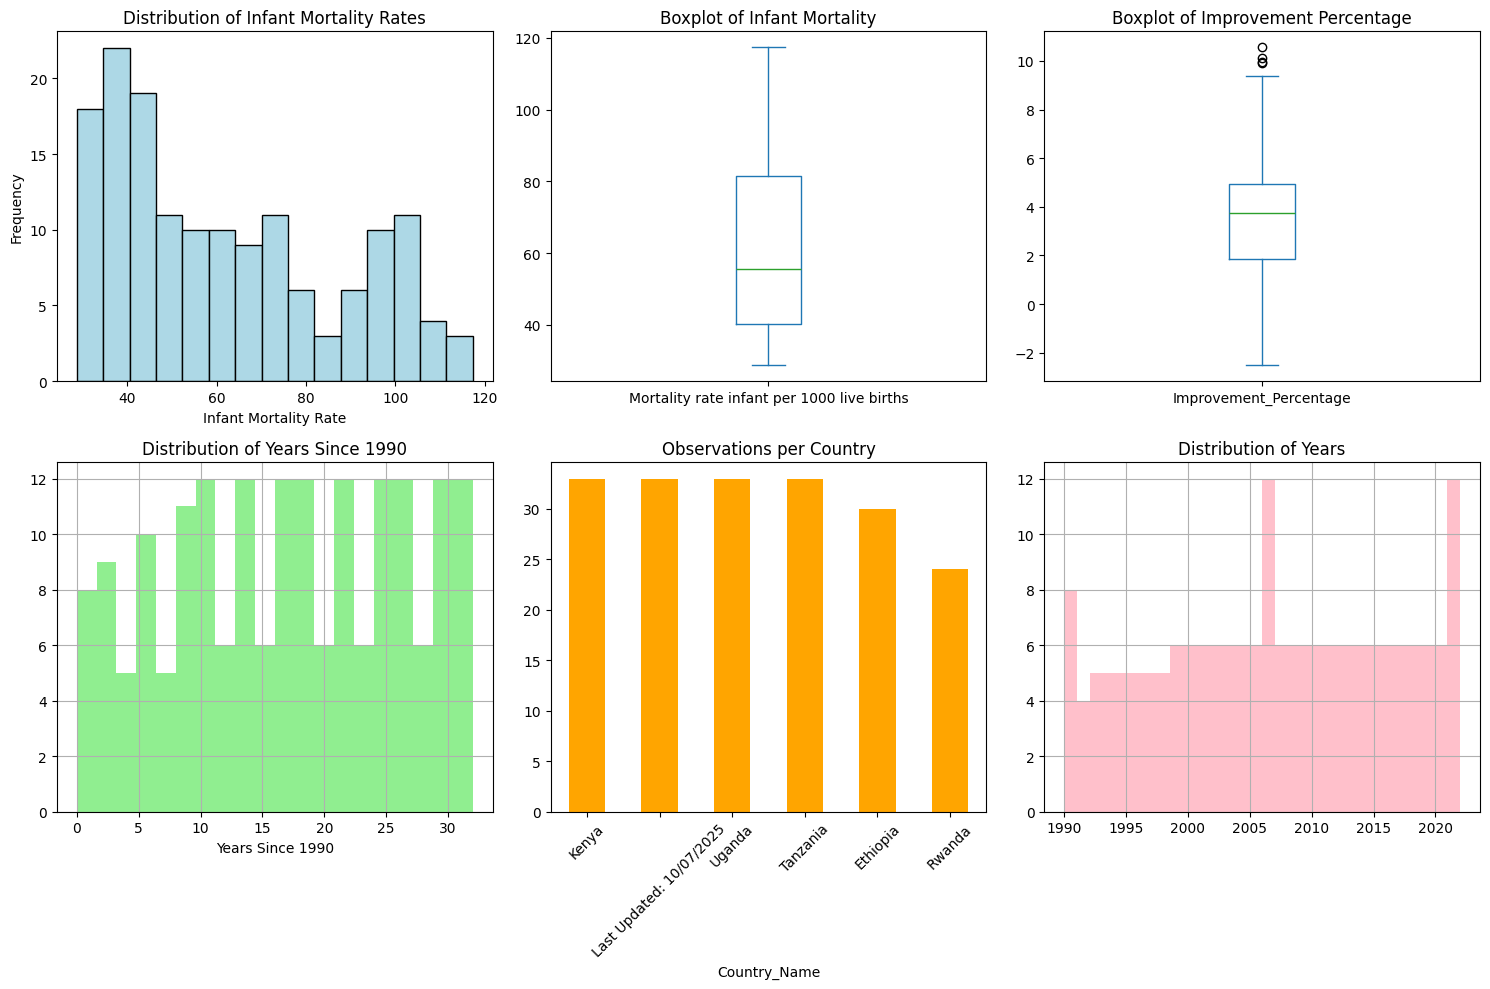

In [15]:
# Univariate Analysis
plt.figure(figsize=(15, 10))

plt.subplot(2, 3, 1)
plt.hist(df_clean['Mortality rate infant per 1000 live births'], bins=15, color='lightblue', edgecolor='black')
plt.title('Distribution of Infant Mortality Rates')
plt.xlabel('Infant Mortality Rate')
plt.ylabel('Frequency')

plt.subplot(2, 3, 2)
df_clean['Mortality rate infant per 1000 live births'].plot(kind='box')
plt.title('Boxplot of Infant Mortality')

plt.subplot(2, 3, 3)
df_clean['Improvement_Percentage'].plot(kind='box')
plt.title('Boxplot of Improvement Percentage')

plt.subplot(2, 3, 4)
df_clean['Years_Since_1990'].hist(bins=20, color='lightgreen')
plt.title('Distribution of Years Since 1990')
plt.xlabel('Years Since 1990')

plt.subplot(2, 3, 5)
df_clean['Country_Name'].value_counts().plot(kind='bar', color='orange')
plt.title('Observations per Country')
plt.xticks(rotation=45)

plt.subplot(2, 3, 6)
df_clean['Year'].hist(bins=30, color='pink')
plt.title('Distribution of Years')

plt.tight_layout()
plt.show()


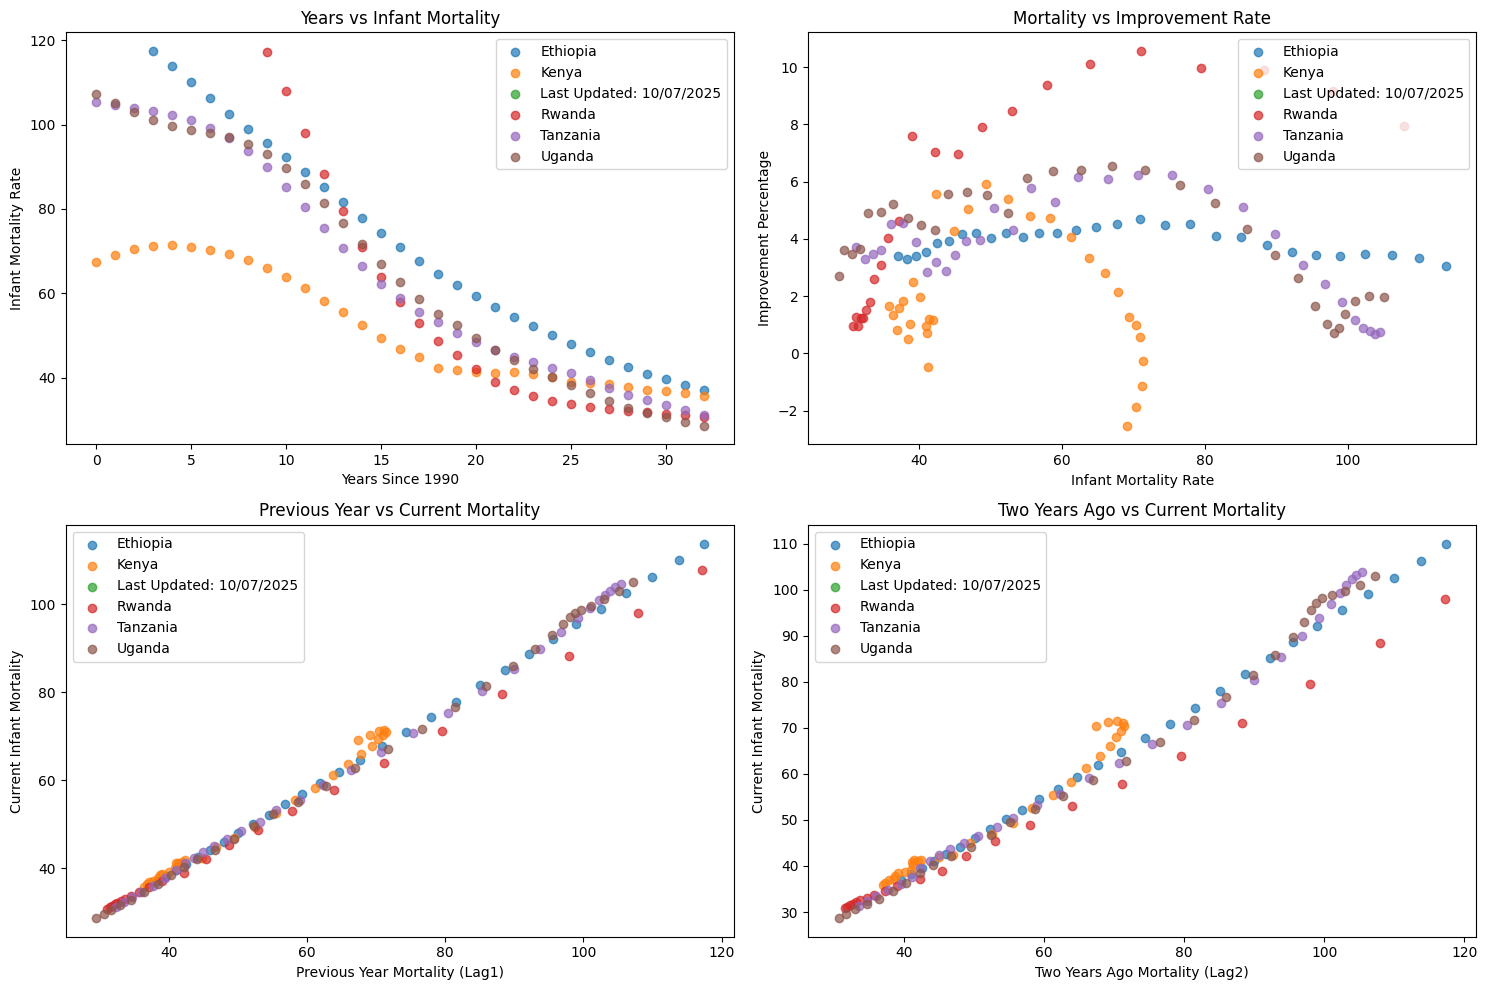

In [16]:
# Bivariate Analysis
plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
for country in df_clean['Country_Name'].unique():
    country_data = df_clean[df_clean['Country_Name'] == country]
    plt.scatter(country_data['Years_Since_1990'], country_data['Mortality rate infant per 1000 live births'], label=country, alpha=0.7)
plt.title('Years vs Infant Mortality')
plt.xlabel('Years Since 1990')
plt.ylabel('Infant Mortality Rate')
plt.legend()

plt.subplot(2, 2, 2)
for country in df_clean['Country_Name'].unique():
    country_data = df_clean[df_clean['Country_Name'] == country]
    plt.scatter(country_data['Mortality rate infant per 1000 live births'], country_data['Improvement_Percentage'], label=country, alpha=0.7)
plt.title('Mortality vs Improvement Rate')
plt.xlabel('Infant Mortality Rate')
plt.ylabel('Improvement Percentage')
plt.legend()

plt.subplot(2, 2, 3)
for country in df_clean['Country_Name'].unique():
    country_data = df_clean[df_clean['Country_Name'] == country]
    plt.scatter(country_data['Mortality_Lag1'], country_data['Mortality rate infant per 1000 live births'], label=country, alpha=0.7)
plt.title('Previous Year vs Current Mortality')
plt.xlabel('Previous Year Mortality (Lag1)')
plt.ylabel('Current Infant Mortality')
plt.legend()

plt.subplot(2, 2, 4)
for country in df_clean['Country_Name'].unique():
    country_data = df_clean[df_clean['Country_Name'] == country]
    plt.scatter(country_data['Mortality_Lag2'], country_data['Mortality rate infant per 1000 live births'], label=country, alpha=0.7)
plt.title('Two Years Ago vs Current Mortality')
plt.xlabel('Two Years Ago Mortality (Lag2)')
plt.ylabel('Current Infant Mortality')
plt.legend()

plt.tight_layout()
plt.show()

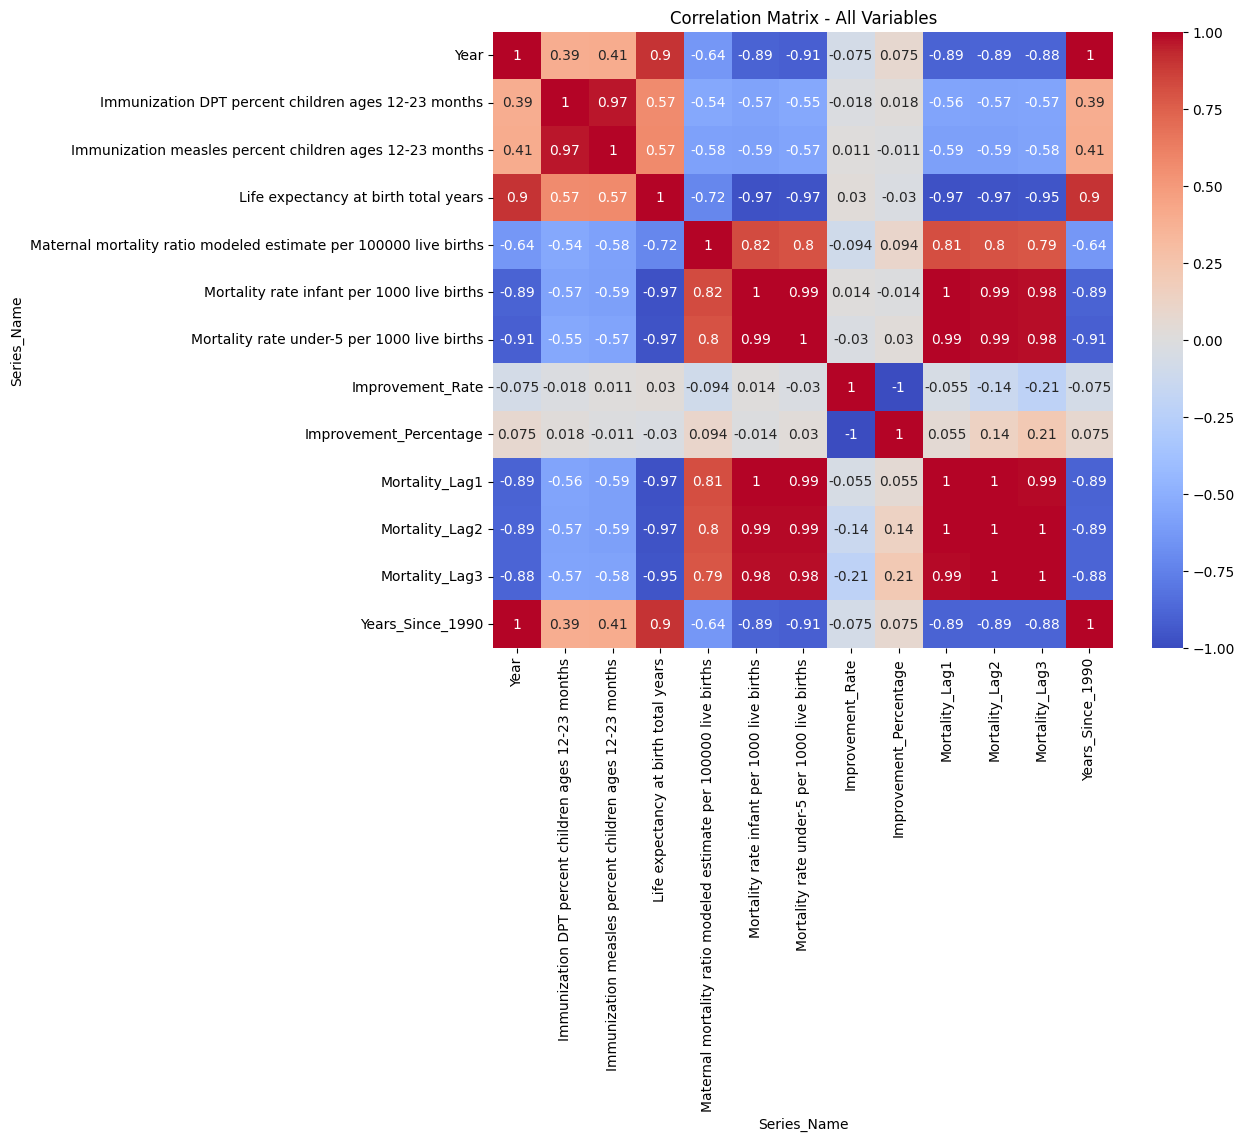

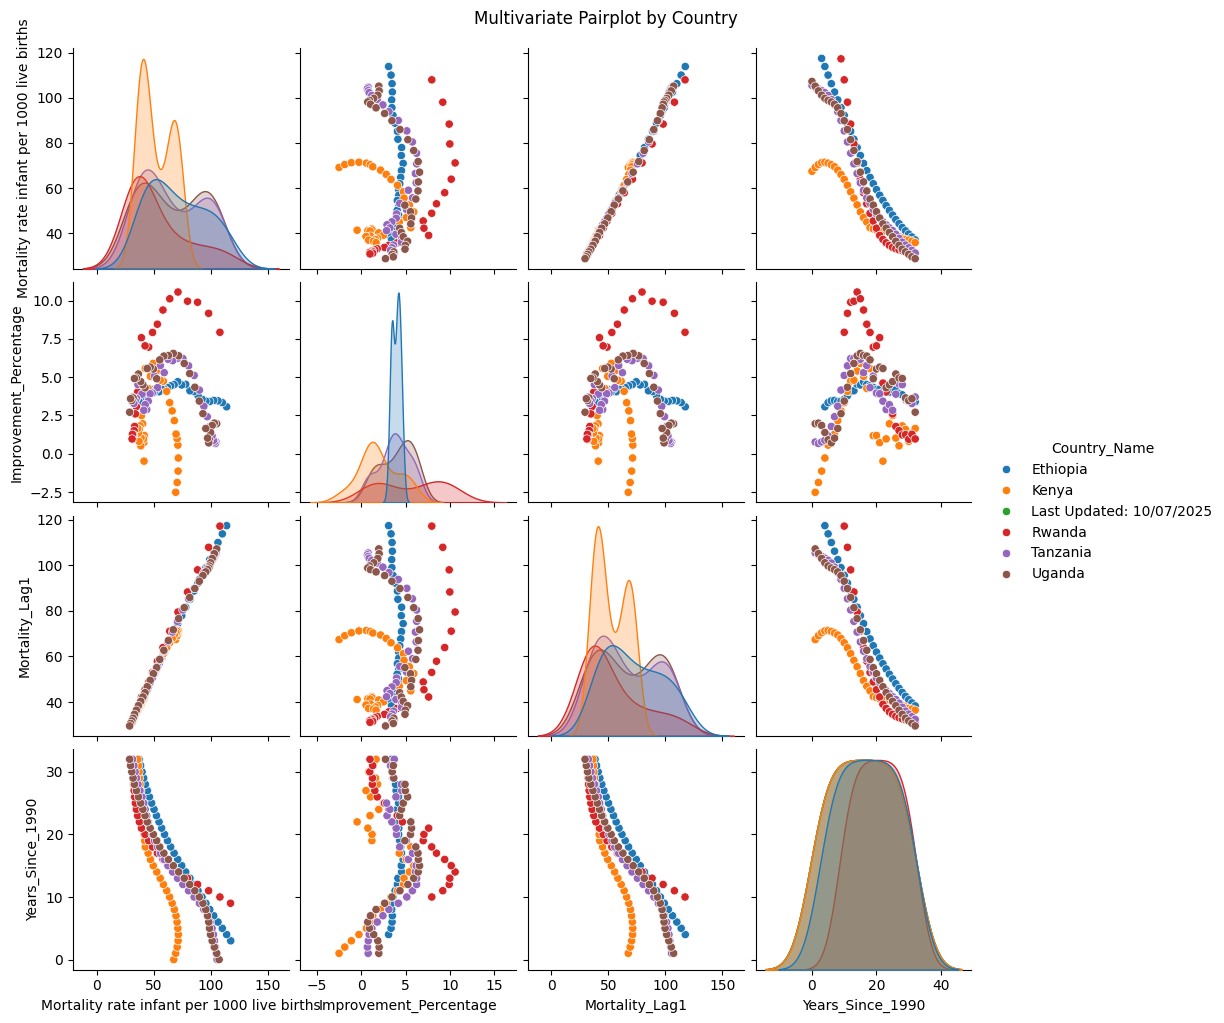

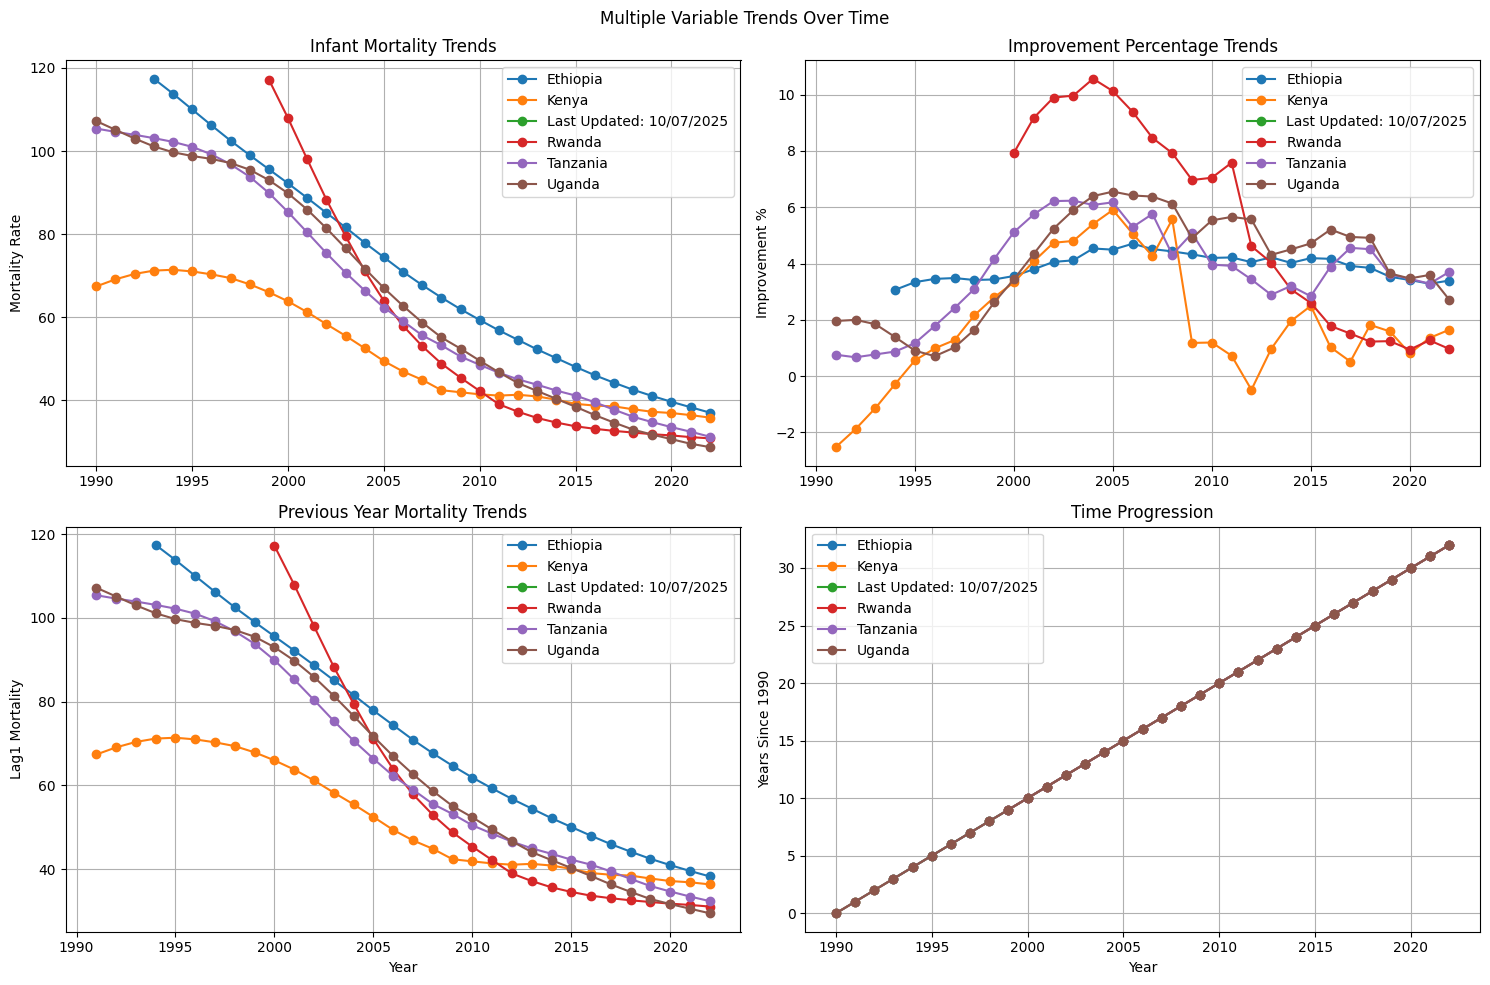

In [17]:
# Multivariate Analysis
plt.figure(figsize=(10, 8))
numeric_cols = df_clean.select_dtypes(include=['number']).columns
correlation_matrix = df_clean[numeric_cols].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix - All Variables')
plt.show()

key_vars = ['Mortality rate infant per 1000 live births', 'Improvement_Percentage', 'Mortality_Lag1', 'Years_Since_1990']
sns.pairplot(df_clean[key_vars + ['Country_Name']], hue='Country_Name', height=2.5)
plt.suptitle('Multivariate Pairplot by Country', y=1.02)
plt.show()

fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('Multiple Variable Trends Over Time')

for i, country in enumerate(df_clean['Country_Name'].unique()):
    country_data = df_clean[df_clean['Country_Name'] == country]

    axes[0, 0].plot(country_data['Year'], country_data['Mortality rate infant per 1000 live births'], label=country, marker='o')
    axes[0, 0].set_title('Infant Mortality Trends')
    axes[0, 0].set_ylabel('Mortality Rate')

    axes[0, 1].plot(country_data['Year'], country_data['Improvement_Percentage'], label=country, marker='o')
    axes[0, 1].set_title('Improvement Percentage Trends')
    axes[0, 1].set_ylabel('Improvement %')

    axes[1, 0].plot(country_data['Year'], country_data['Mortality_Lag1'], label=country, marker='o')
    axes[1, 0].set_title('Previous Year Mortality Trends')
    axes[1, 0].set_ylabel('Lag1 Mortality')
    axes[1, 0].set_xlabel('Year')

    axes[1, 1].plot(country_data['Year'], country_data['Years_Since_1990'], label=country, marker='o')
    axes[1, 1].set_title('Time Progression')
    axes[1, 1].set_ylabel('Years Since 1990')
    axes[1, 1].set_xlabel('Year')

for ax in axes.flat:
    ax.legend()
    ax.grid(True)

plt.tight_layout()
plt.show()

<h1>Comparative Data Analysis</h2>


In [18]:
# Countries similar to Ethiopia (East African, similar development levels)
similar_countries = ['Ethiopia', 'Kenya', 'Tanzania', 'Rwanda', 'Uganda']
comparison_df = df_clean[df_clean['Country_Name'].isin(similar_countries)]

comparison_df.shape

(153, 15)

In [19]:
# Variables for comparison
comparison_variables = ['Mortality rate infant per 1000 live births', 'Improvement_Percentage', 'Mortality_Lag1']

for var in comparison_variables:
    print(" -", var)

 - Mortality rate infant per 1000 live births
 - Improvement_Percentage
 - Mortality_Lag1


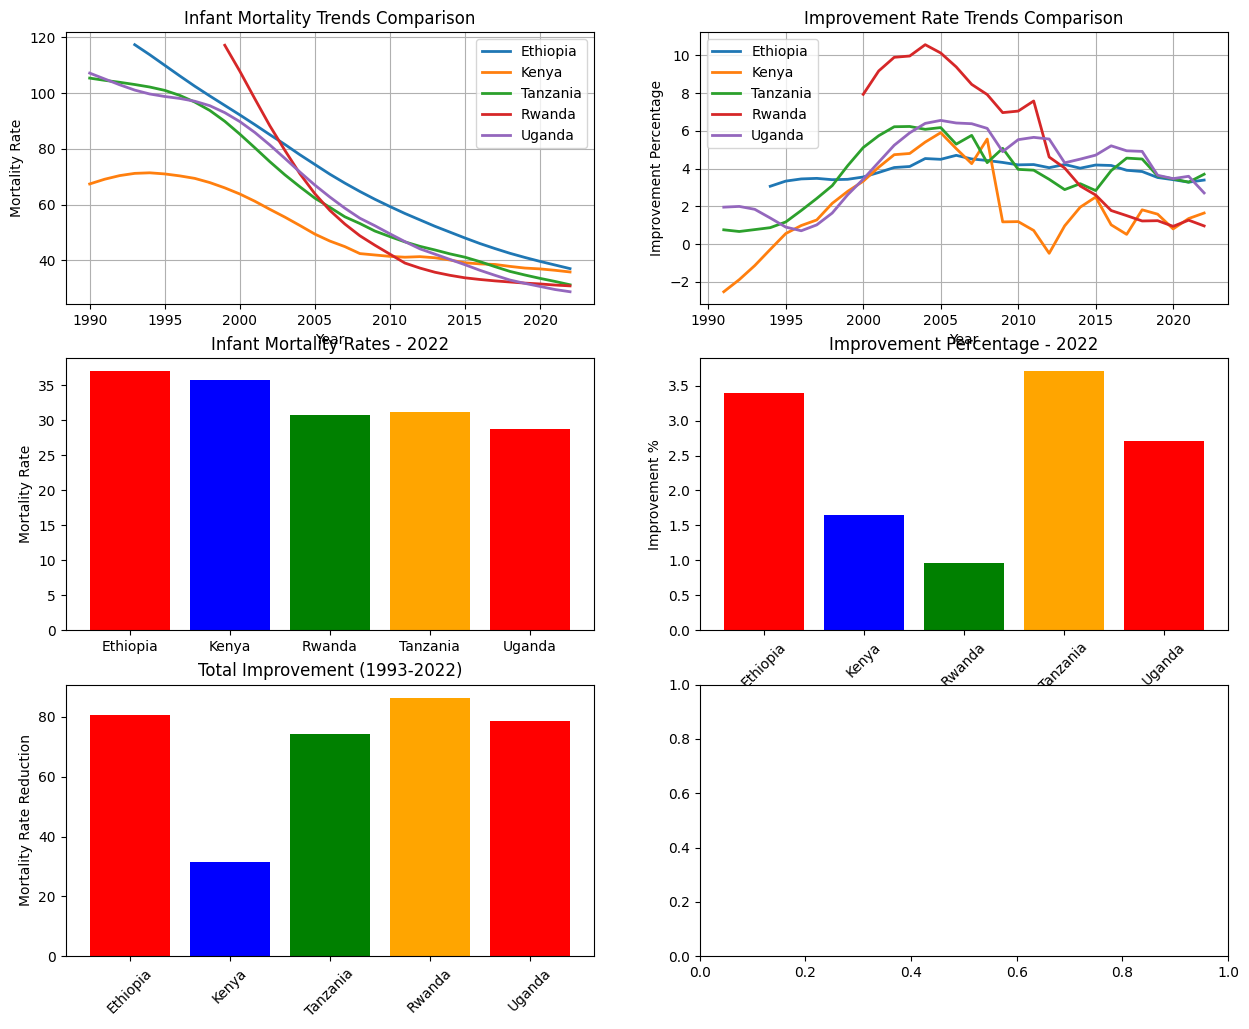

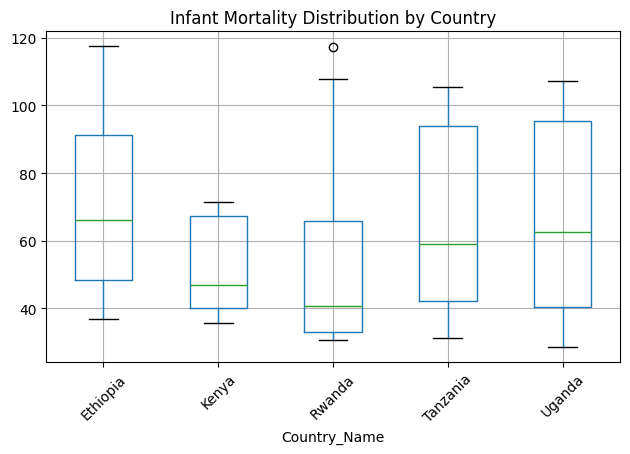

In [20]:
# 1. Comparative Trends Over Time
plt.figure(figsize=(15, 12))

plt.subplot(3, 2, 1)
for country in similar_countries:
    country_data = comparison_df[comparison_df['Country_Name'] == country]
    plt.plot(country_data['Year'], country_data['Mortality rate infant per 1000 live births'], label=country, linewidth=2)
plt.title('Infant Mortality Trends Comparison')
plt.xlabel('Year')
plt.ylabel('Mortality Rate')
plt.legend()
plt.grid(True)

plt.subplot(3, 2, 2)
for country in similar_countries:
    country_data = comparison_df[comparison_df['Country_Name'] == country]
    plt.plot(country_data['Year'], country_data['Improvement_Percentage'], label=country, linewidth=2)
plt.title('Improvement Rate Trends Comparison')
plt.xlabel('Year')
plt.ylabel('Improvement Percentage')
plt.legend()
plt.grid(True)


# 2. Latest Year Comparison
latest_year = comparison_df['Year'].max()
latest_comparison = comparison_df[comparison_df['Year'] == latest_year]

plt.subplot(3, 2, 3)
plt.bar(latest_comparison['Country_Name'], latest_comparison['Mortality rate infant per 1000 live births'], color=['red', 'blue', 'green', 'orange'])
plt.title('Infant Mortality Rates - ' + str(latest_year))
plt.ylabel('Mortality Rate')
plt.xticks(rotation=0)

plt.subplot(3, 2, 4)
plt.bar(latest_comparison['Country_Name'], latest_comparison['Improvement_Percentage'], color=['red', 'blue', 'green', 'orange'])
plt.title('Improvement Percentage - ' + str(latest_year))
plt.ylabel('Improvement %')
plt.xticks(rotation=45)

# 3. Improvement Over Entire Period
improvement_summary = []
for country in similar_countries:
    country_data = comparison_df[comparison_df['Country_Name'] == country]
    start_rate = country_data[country_data['Year'] == country_data['Year'].min()]['Mortality rate infant per 1000 live births'].values[0]
    end_rate = country_data[country_data['Year'] == latest_year]['Mortality rate infant per 1000 live births'].values[0]
    total_improvement = start_rate - end_rate
    improvement_summary.append((country, total_improvement, start_rate, end_rate))

countries = [x[0] for x in improvement_summary]
improvements = [x[1] for x in improvement_summary]

plt.subplot(3, 2, 5)
plt.bar(countries, improvements, color=['red', 'blue', 'green', 'orange'])
plt.title('Total Improvement (1993-' + str(latest_year) + ')')
plt.ylabel('Mortality Rate Reduction')
plt.xticks(rotation=45)

# 4. Comparative Boxplots
plt.subplot(3, 2, 6)
comparison_df.boxplot(column='Mortality rate infant per 1000 live births', by='Country_Name')
plt.title('Infant Mortality Distribution by Country')
plt.suptitle('')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

In [21]:
# Summary statistics by country
for country in similar_countries:
    country_data = comparison_df[comparison_df['Country_Name'] == country]
    print("\n" + country + " Statistics:")
    print("Average Mortality Rate:", round(country_data['Mortality rate infant per 1000 live births'].mean(), 2))
    print("Average Improvement %:", round(country_data['Improvement_Percentage'].mean(), 2))
    print("Best Year (Lowest Mortality):", int(country_data.loc[country_data['Mortality rate infant per 1000 live births'].idxmin(), 'Year']))
    print("Worst Year (Highest Mortality):", int(country_data.loc[country_data['Mortality rate infant per 1000 live births'].idxmax(), 'Year']))

# Ranking analysis
print("\n=== COUNTRY RANKINGS ===")
latest_data = comparison_df[comparison_df['Year'] == latest_year].sort_values('Mortality rate infant per 1000 live births')
print("Current Ranking (Lowest to Highest Mortality):")
for i, (_, row) in enumerate(latest_data.iterrows(), 1):
    print(str(i) + ". " + row['Country_Name'] + ": " + str(round(row['Mortality rate infant per 1000 live births'], 2)))

print("\nImprovement Ranking (Total Reduction 1993-2023):")
improvement_summary.sort(key=lambda x: x[1], reverse=True)
for i, (country, improvement, start, end) in enumerate(improvement_summary, 1):
    print(str(i) + ". " + country + ": " + str(round(improvement, 2)) + " points reduction")


Ethiopia Statistics:
Average Mortality Rate: 70.64
Average Improvement %: 3.9
Best Year (Lowest Mortality): 2022
Worst Year (Highest Mortality): 1993

Kenya Statistics:
Average Mortality Rate: 52.0
Average Improvement %: 1.93
Best Year (Lowest Mortality): 2022
Worst Year (Highest Mortality): 1994

Tanzania Statistics:
Average Mortality Rate: 65.78
Average Improvement %: 3.72
Best Year (Lowest Mortality): 2022
Worst Year (Highest Mortality): 1990

Rwanda Statistics:
Average Mortality Rate: 53.19
Average Improvement %: 5.58
Best Year (Lowest Mortality): 2022
Worst Year (Highest Mortality): 1999

Uganda Statistics:
Average Mortality Rate: 66.23
Average Improvement %: 4.02
Best Year (Lowest Mortality): 2022
Worst Year (Highest Mortality): 1990

=== COUNTRY RANKINGS ===
Current Ranking (Lowest to Highest Mortality):
1. Uganda: 28.7
2. Rwanda: 30.8
3. Tanzania: 31.2
4. Kenya: 35.8
5. Ethiopia: 37.0

Improvement Ranking (Total Reduction 1993-2023):
1. Rwanda: 86.4 points reduction
2. Ethiopi

/tmp/ipython-input-1378280312.py:20: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_xticklabels(latest_comparison['Country_Name'], rotation=45)
/tmp/ipython-input-1378280312.py:34: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax3.set_xticklabels(countries_improve, rotation=45)
/tmp/ipython-input-1378280312.py:47: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax4.set_xticklabels(avg_improvement.index, rotation=45)


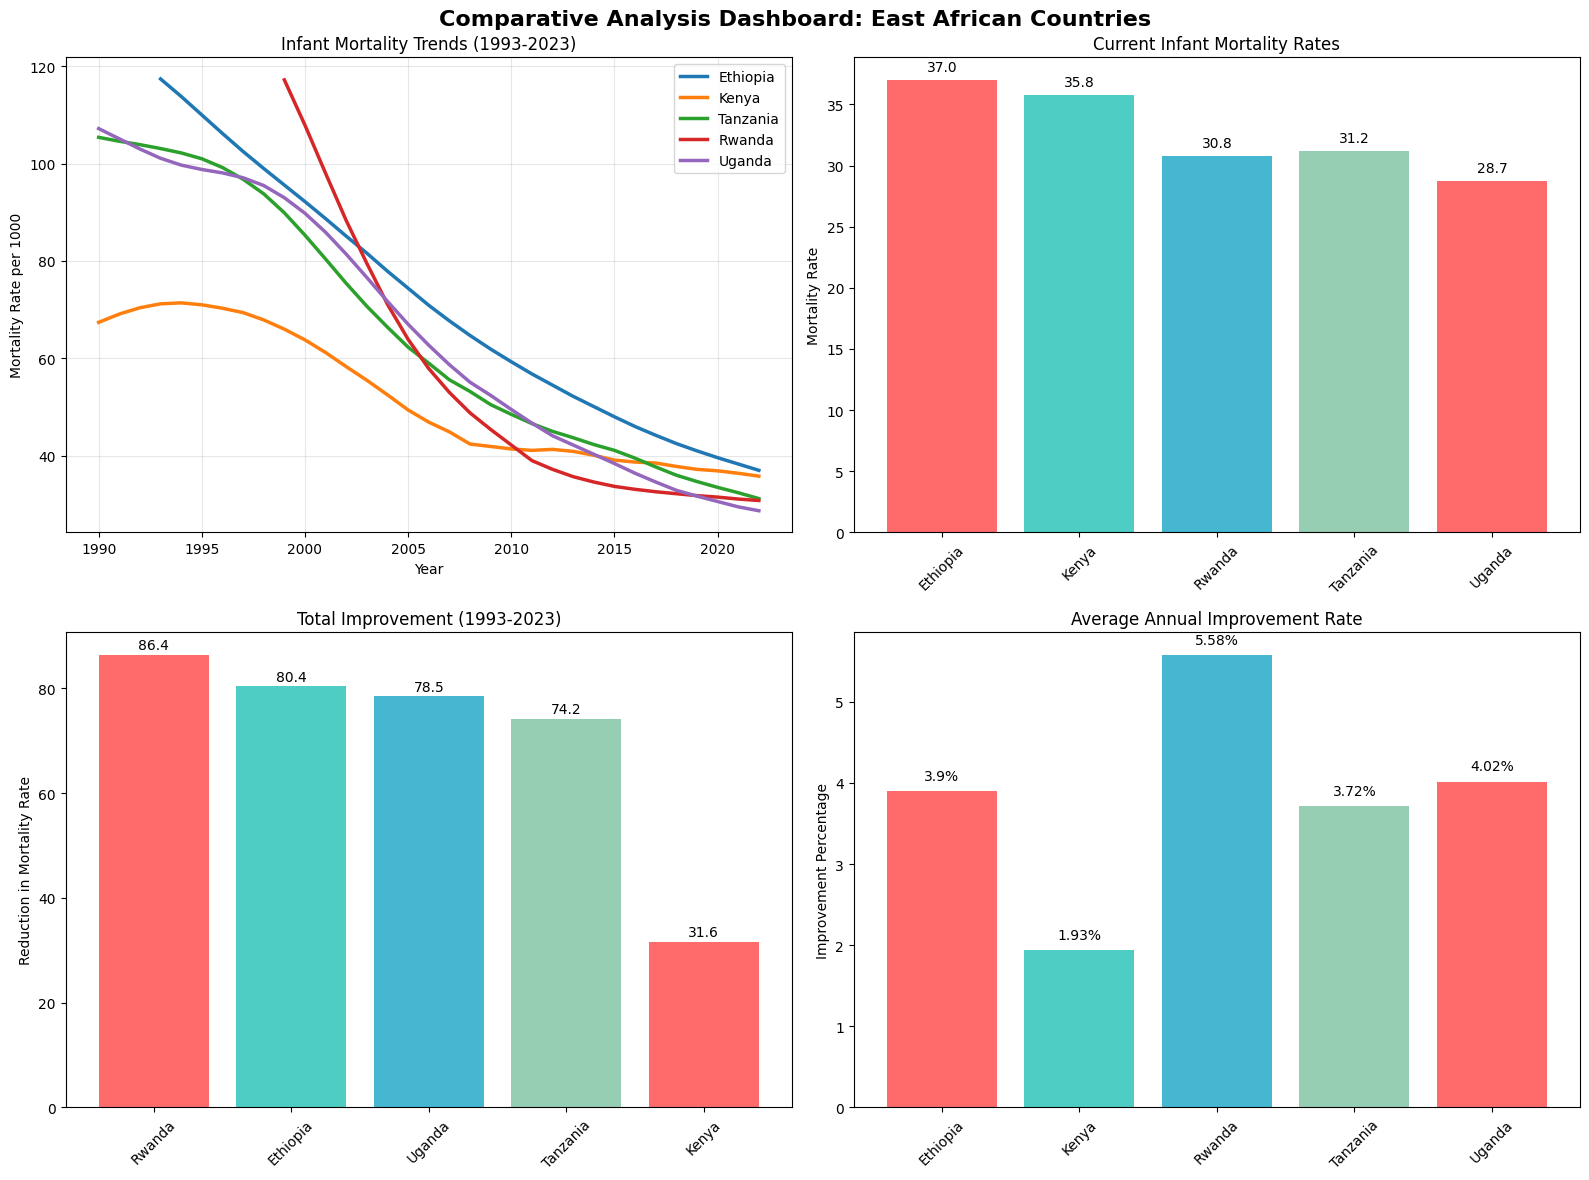

In [22]:
# Create a comprehensive dashboard-style plot
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Comparative Analysis Dashboard: East African Countries', fontsize=16, fontweight='bold')

# Plot 1: Trends
for country in similar_countries:
    country_data = comparison_df[comparison_df['Country_Name'] == country]
    ax1.plot(country_data['Year'], country_data['Mortality rate infant per 1000 live births'], label=country, linewidth=2.5)
ax1.set_title('Infant Mortality Trends (1993-2023)')
ax1.set_xlabel('Year')
ax1.set_ylabel('Mortality Rate per 1000')
ax1.legend()
ax1.grid(True, alpha=0.3)

# Plot 2: Current Status
colors = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#96CEB4']
bars = ax2.bar(latest_comparison['Country_Name'], latest_comparison['Mortality rate infant per 1000 live births'], color=colors)
ax2.set_title('Current Infant Mortality Rates')
ax2.set_ylabel('Mortality Rate')
ax2.set_xticklabels(latest_comparison['Country_Name'], rotation=45)

# Add values on bars
for bar in bars:
    height = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width()/2., height + 0.5,
            str(round(height, 1)), ha='center', va='bottom')

# Plot 3: Total Improvement
countries_improve = [x[0] for x in improvement_summary]
improvements = [x[1] for x in improvement_summary]
bars = ax3.bar(countries_improve, improvements, color=colors)
ax3.set_title('Total Improvement (1993-2023)')
ax3.set_ylabel('Reduction in Mortality Rate')
ax3.set_xticklabels(countries_improve, rotation=45)

# Add values on bars
for bar in bars:
    height = bar.get_height()
    ax3.text(bar.get_x() + bar.get_width()/2., height + 0.5,
            str(round(height, 1)), ha='center', va='bottom')

# Plot 4: Average Improvement Rates
avg_improvement = comparison_df.groupby('Country_Name')['Improvement_Percentage'].mean()
bars = ax4.bar(avg_improvement.index, avg_improvement.values, color=colors)
ax4.set_title('Average Annual Improvement Rate')
ax4.set_ylabel('Improvement Percentage')
ax4.set_xticklabels(avg_improvement.index, rotation=45)

# Add values on bars
for bar in bars:
    height = bar.get_height()
    ax4.text(bar.get_x() + bar.get_width()/2., height + 0.1,
            str(round(height, 2)) + '%', ha='center', va='bottom')

plt.tight_layout()
plt.show()

<h2> PREDICTIVE MODELING </H2>


In [23]:
# Import necessary libraries
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error, mean_squared_error
import joblib

# Select Ethiopia data from our dataframe
ethiopia_data = df_clean[df_clean['Country_Name'] == 'Ethiopia'].copy()
# keeping only year and infant mortality rate for time series
ethiopia_ts = ethiopia_data[['Year', 'Mortality rate infant per 1000 live births']]
# set Year as the index
ethiopia_ts = ethiopia_ts.set_index('Year')
ethiopia_ts = ethiopia_ts.sort_index()
# use Min and Max to understand the years available
ethiopia_ts.index.min(), "to", ethiopia_ts.index.max()

(np.int64(1993), 'to', np.int64(2022))

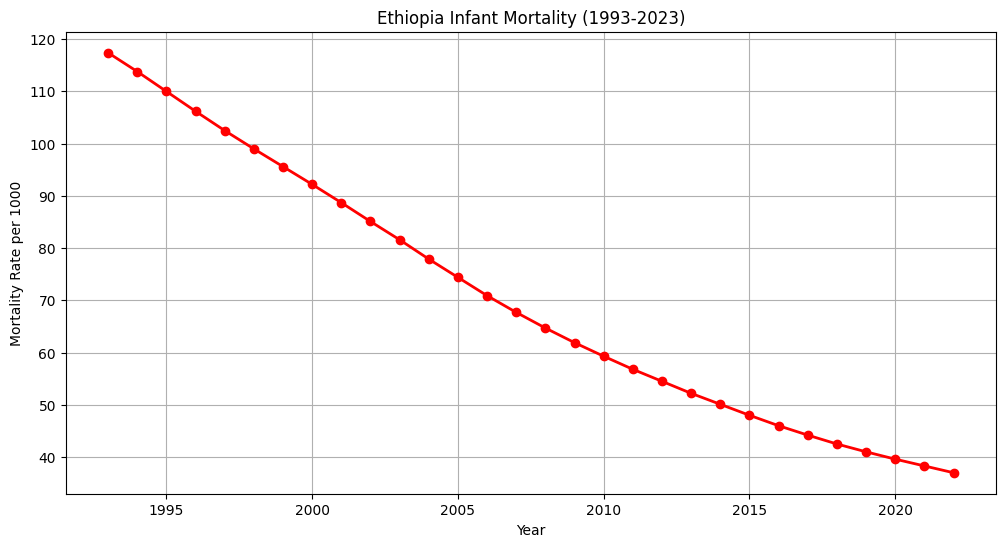

In [24]:
# visualizing the time series
plt.figure(figsize=(12, 6))
plt.plot(ethiopia_ts.index, ethiopia_ts['Mortality rate infant per 1000 live births'],
         marker='o', linewidth=2, color='red')
plt.title('Ethiopia Infant Mortality (1993-2023)')
plt.xlabel('Year')
plt.ylabel('Mortality Rate per 1000')
plt.grid(True)
plt.show()

In [25]:
# split the data in to training set and test set
train = ethiopia_ts.loc[1993:2018]
test = ethiopia_ts.loc[2019:2023]
len(train), len(test)

(26, 4)

In [26]:
# building and training ARIMA model
# parameters :p=1, d=1, q=1
model = ARIMA(train, order=(1, 1, 1))
model_fit = model.fit()

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)


In [27]:
# testing model
# make prediction for test period
predictions = model_fit.forecast(steps=len(test))
# create comparison table
comparison = pd.DataFrame({
    'Year': test.index,
    'Actual': test['Mortality rate infant per 1000 live births'].values,
    'Predicted': predictions.values,
    'Difference': test['Mortality rate infant per 1000 live births'].values - predictions.values})
print(comparison.to_string(index=False))

 Year  Actual  Predicted  Difference
 2019    41.0  40.815232    0.184768
 2020    39.6  39.133812    0.466188
 2021    38.3  37.455732    0.844268
 2022    37.0  35.780986    1.219014


/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [28]:
# calculate model accuracy
mae = mean_absolute_error(test, predictions)
mse = mean_squared_error(test, predictions)
rmse = np.sqrt(mse)
mape = np.mean(np.abs((test.values - predictions.values) / test.values)) * 100

print("MODEL EVALUATION METRICS")
print("="*50)
print(f"MAE  (Mean Absolute Error): {mae:.3f}")
print(f"RMSE (Root Mean Squared Error): {rmse:.3f}")
print(f"MAPE (Mean Absolute Percentage Error): {mape:.2f}%")

# Interpretation
print("INTERPRETATION")
print("="*50)
if mape < 10:
    print(f"✅ Excellent accuracy (MAPE < 10%)")
elif mape < 20:
    print(f"✅ Good accuracy (MAPE < 20%)")
elif mape < 30:
    print(f"⚠️  Fair accuracy (MAPE < 30%)")
else:
    print(f"❌ Poor accuracy (MAPE > 30%)")

MODEL EVALUATION METRICS
MAE  (Mean Absolute Error): 0.679
RMSE (Root Mean Squared Error): 0.783
MAPE (Mean Absolute Percentage Error): 5.24%
INTERPRETATION
✅ Excellent accuracy (MAPE < 10%)


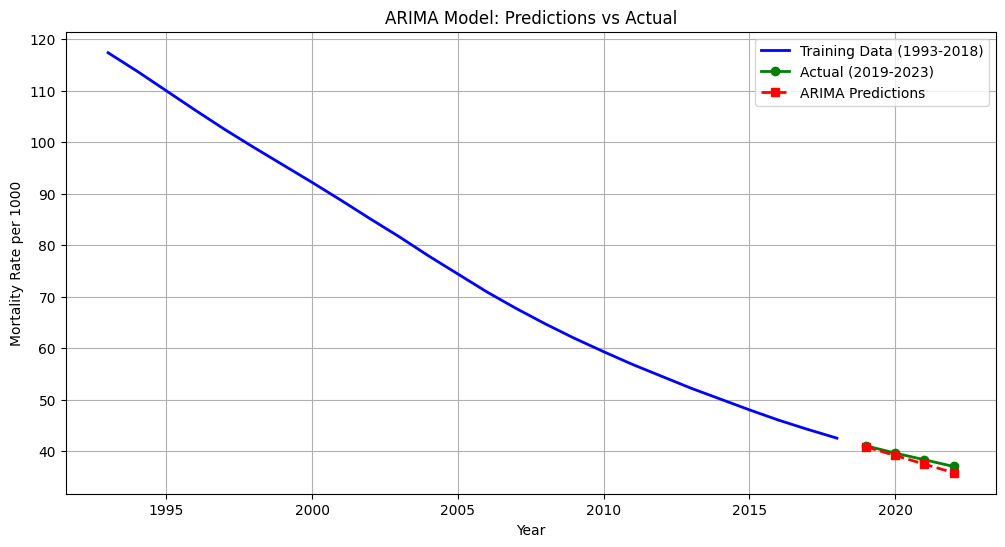

In [29]:
# visualize predictions vs actual
plt.figure(figsize=(12, 6))
# plot the training data
plt.plot(train.index, train['Mortality rate infant per 1000 live births'],
         label='Training Data (1993-2018)', color='blue', linewidth=2)
# Plot actual test values
plt.plot(test.index, test['Mortality rate infant per 1000 live births'],
         label='Actual (2019-2023)', color='green', marker='o', linewidth=2)
# Plot predictions
plt.plot(test.index, predictions,
         label='ARIMA Predictions', color='red', linestyle='--', marker='s', linewidth=2)

plt.title('ARIMA Model: Predictions vs Actual')
plt.xlabel('Year')
plt.ylabel('Mortality Rate per 1000')
plt.legend()
plt.grid(True)
plt.show()

In [30]:
#Forecasting future years (2024-2030)
# Retrain model on ALL data for better future predictions
final_model = ARIMA(ethiopia_ts, order=(1, 1, 1))
final_fit = final_model.fit()
# Forecast next 7 years
future_years = list(range(2024, 2031))
future_predictions = final_fit.forecast(steps=7)

print("\nFuture Forecast for Ethiopia (2024-2030):")
print("-" * 40)
for year, value in zip(future_years, future_predictions):
    print(year, ":", round(value, 1))


Future Forecast for Ethiopia (2024-2030):
----------------------------------------
2024 : 35.7
2025 : 34.4
2026 : 33.1
2027 : 31.8
2028 : 30.5
2029 : 29.2
2030 : 27.9


/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be give

In [31]:
# Get confidence intervals
forecast_result = final_fit.get_forecast(steps=7)
confidence_intervals = forecast_result.conf_int()

print("\nConfidence Intervals (95% confidence):")
print("-" * 50)

# Create a confidence interval dataframe for cleaner output
ci_df = pd.DataFrame({
    'Year': future_years,
    'Prediction': future_predictions,
    'Lower_95%': confidence_intervals.iloc[:, 0],
    'Upper_95%': confidence_intervals.iloc[:, 1]})
ci_df = ci_df.round(1)

print(ci_df.to_string(index=False))


Confidence Intervals (95% confidence):
--------------------------------------------------
 Year  Prediction  Lower_95%  Upper_95%
 2024        35.7       35.4       36.0
 2025        34.4       33.7       35.1
 2026        33.1       31.9       34.3
 2027        31.8       30.1       33.6
 2028        30.5       28.1       32.9
 2029        29.2       26.1       32.3
 2030        27.9       24.1       31.8


/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


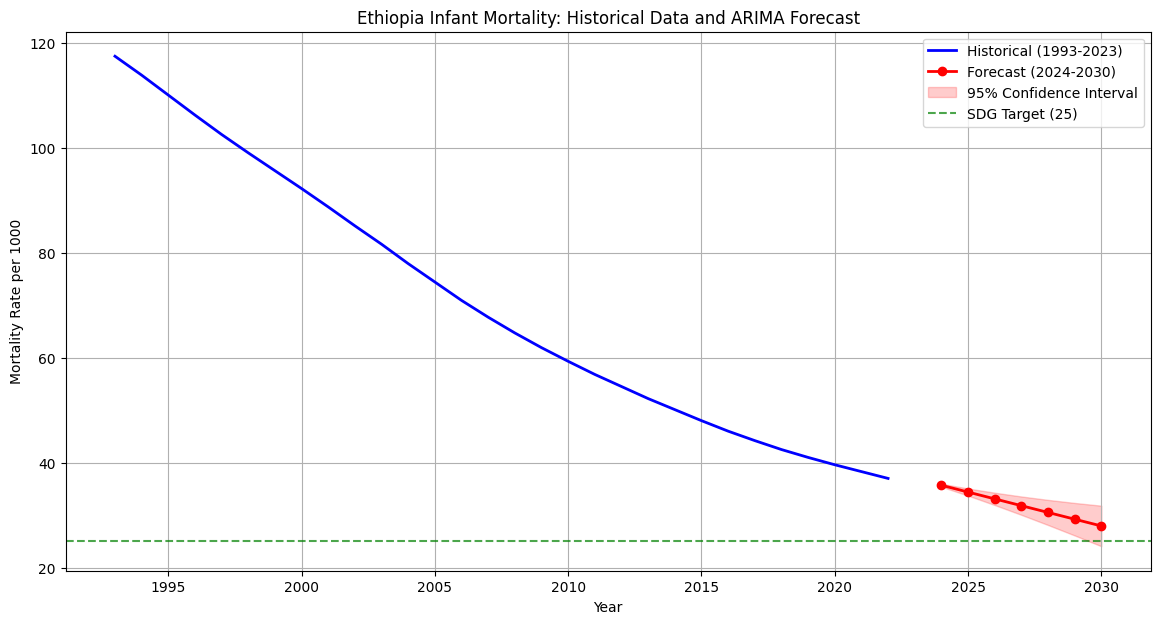

In [32]:
# visualize complete forecast
plt.figure(figsize=(14, 7))
# Plot historical data
plt.plot(ethiopia_ts.index, ethiopia_ts['Mortality rate infant per 1000 live births'],
         label='Historical (1993-2023)', color='blue', linewidth=2)
# Plot future forecast
plt.plot(future_years, future_predictions,
         label='Forecast (2024-2030)', color='red', linewidth=2, marker='o')
# Plot confidence interval
plt.fill_between(future_years,
                 confidence_intervals.iloc[:, 0],
                 confidence_intervals.iloc[:, 1],
                 color='red', alpha=0.2, label='95% Confidence Interval')
# Add SDG target line
plt.axhline(y=25, color='green', linestyle='--', alpha=0.7, label='SDG Target (25)')

plt.title('Ethiopia Infant Mortality: Historical Data and ARIMA Forecast')
plt.xlabel('Year')
plt.ylabel('Mortality Rate per 1000')
plt.legend()
plt.grid(True)
plt.show()

In [33]:
# check SDG target achievment
predicted_2030 = future_predictions.iloc[-1]
sdg_target = 25

print("Predicted 2030 value:", round(predicted_2030, 1))
print("SDG Target 2030:", sdg_target)

if predicted_2030 <= sdg_target:
    print("Conclusion: Ethiopia is on track to meet SDG target!")
else:
    difference = predicted_2030 - sdg_target
    print("Conclusion: Ethiopia may miss SDG target by", round(difference, 1), "points")
    print("Additional efforts may be needed.")

Predicted 2030 value: 27.9
SDG Target 2030: 25
Conclusion: Ethiopia may miss SDG target by 2.9 points
Additional efforts may be needed.


In [34]:
# Save the trained model
# use joblib because its best for ARIMA
joblib.dump(final_fit, 'ethiopia_arima_model.pkl')
print("Model saved: ethiopia_arima_model.pkl")

# Save predictions to CSV
forecast_df = pd.DataFrame({
    'Year': future_years,
    'Predicted_Mortality': future_predictions.values,
    'Lower_CI': confidence_intervals.iloc[:, 0].values,
    'Upper_CI': confidence_intervals.iloc[:, 1].values
})
forecast_df.to_csv('ethiopia_forecast_2024_2030.csv', index=False)
print("Forecast saved: ethiopia_forecast_2024_2030.csv")

# Save test results
test_results = pd.DataFrame({
    'Year': test.index,
    'Actual': test['Mortality rate infant per 1000 live births'].values,
    'Predicted': predictions.values,
    'Error': test['Mortality rate infant per 1000 live births'].values - predictions.values
})
test_results.to_csv('arima_test_results.csv', index=False)
print("Test results saved: arima_test_results.csv")

print("\n" + "=" * 50)
print("ARIMA MODELING COMPLETE!")
print("=" * 50)

Model saved: ethiopia_arima_model.pkl
Forecast saved: ethiopia_forecast_2024_2030.csv
Test results saved: arima_test_results.csv

ARIMA MODELING COMPLETE!


/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be give


2028 Forecast Comparison:
Ethiopia: 30.5
Kenya: 33.3
Tanzania: 25.6
Rwanda: 29.7
Uganda: 25.5


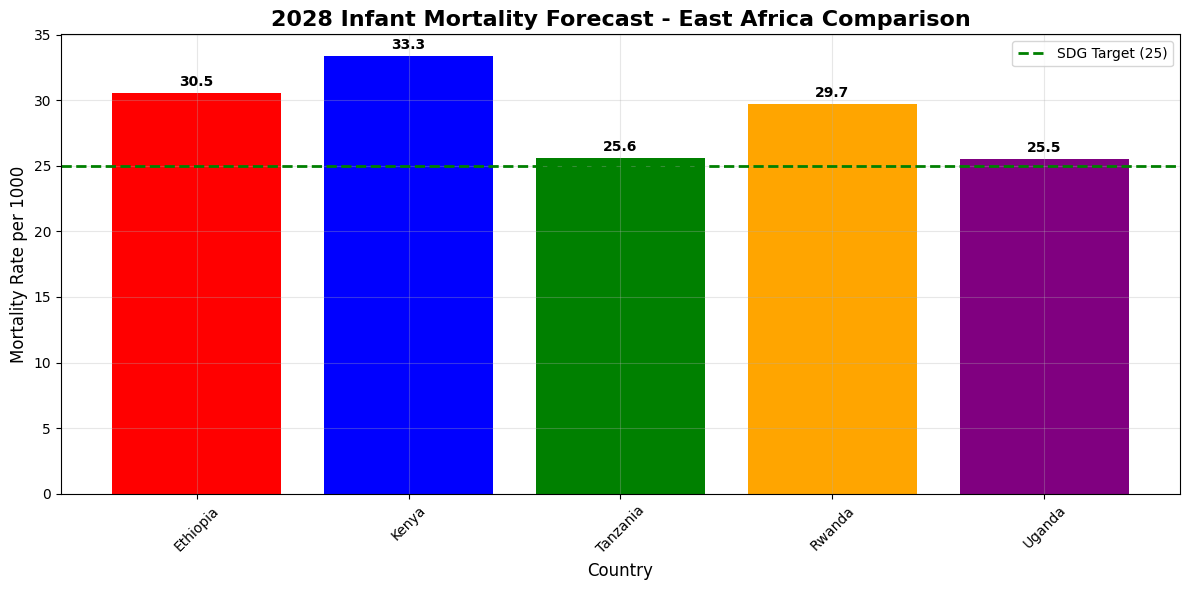

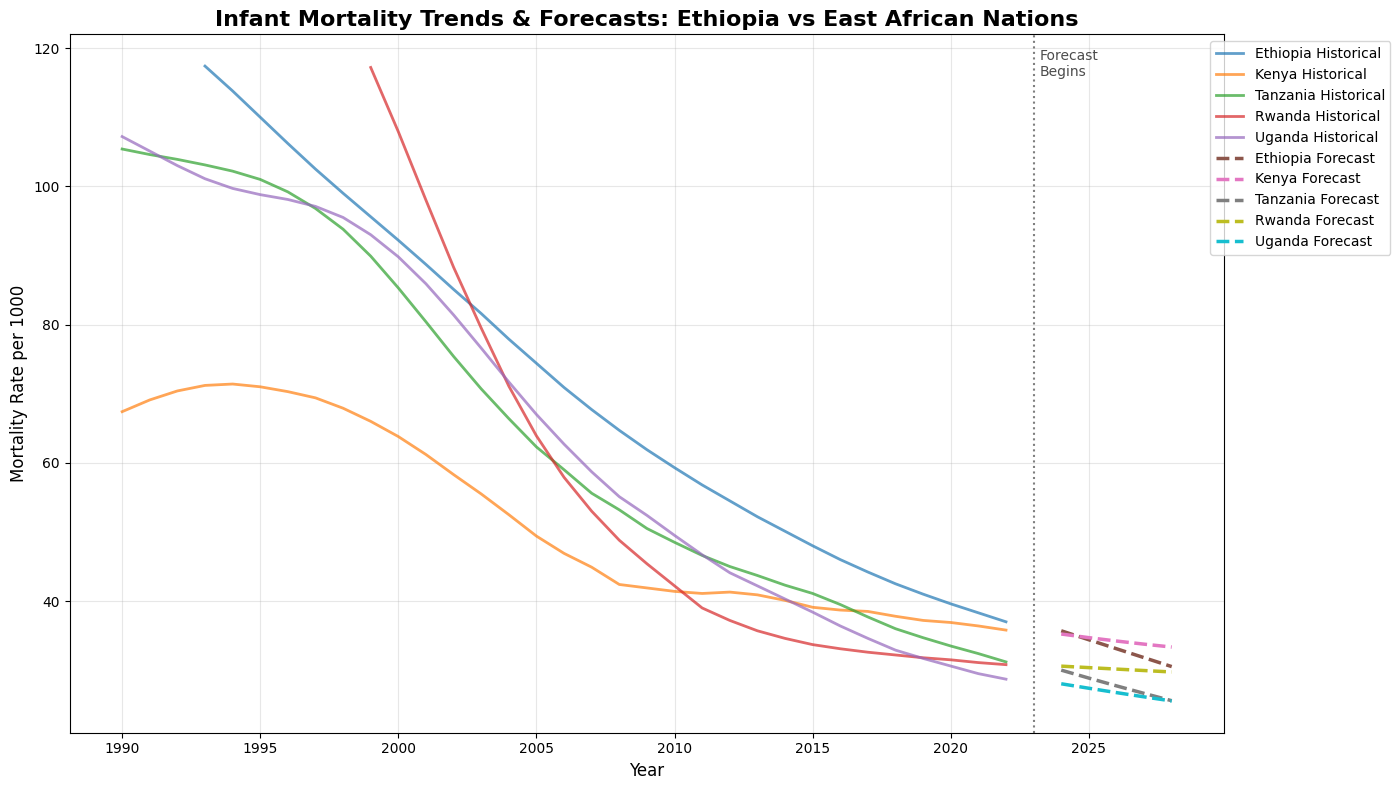

Comparative Forecasts saved: comparative_forecasts_all.csv


In [37]:
# Added comparative forecast to assess Ethiopia's progress relative to similar countries
# Forecast for all similar countries
forecast_results = {}
comparative_data = []

for country in similar_countries:
    country_data = df_clean[df_clean['Country_Name'] == country]
    country_series = country_data.set_index('Year')['Mortality rate infant per 1000 live births']

    # Train ARIMA model
    model = ARIMA(country_series, order=(1,1,1))
    model_fit = model.fit()

    # Forecast next 5 years
    forecast = model_fit.forecast(steps=5)
    forecast_results[country] = forecast

# Compare all countries' 2028 forecasts
print("\n2028 Forecast Comparison:")
for country in similar_countries:
    print(f"{country}: {forecast_results[country].iloc[-1]:.1f}")
# comparative forecast barchart
countries = list(forecast_results.keys())
forecast_2028 = [forecast_results[country].iloc[-1] for country in countries]

# Create the bar chart
plt.figure(figsize=(12, 6))
bars = plt.bar(countries, forecast_2028, color=['red', 'blue', 'green', 'orange', 'purple'])

# Add SDG target line
plt.axhline(y=25, color='green', linestyle='--', linewidth=2, label='SDG Target (25)')

# Add values on top of bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 0.3,
             f'{height:.1f}', ha='center', va='bottom', fontweight='bold')

plt.title('2028 Infant Mortality Forecast - East Africa Comparison', fontsize=16, fontweight='bold')
plt.xlabel('Country', fontsize=12)
plt.ylabel('Mortality Rate per 1000', fontsize=12)
plt.legend()
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('comparative_forecast_2028.png', dpi=300, bbox_inches='tight')
plt.show()


# Trend comparison plot
plt.figure(figsize=(14, 8))

# Plot historical trends
for i, country in enumerate(similar_countries):
    country_data = df_clean[df_clean['Country_Name'] == country]
    plt.plot(country_data['Year'],
             country_data['Mortality rate infant per 1000 live births'],
             label=f'{country} Historical',
             linewidth=2,
             alpha=0.7)

# Plot forecasts
for i, country in enumerate(similar_countries):
    forecast_years = list(range(2024, 2029))
    plt.plot(forecast_years, forecast_results[country].values,
             label=f'{country} Forecast',
             linestyle='--',
             linewidth=2.5)

plt.title('Infant Mortality Trends & Forecasts: Ethiopia vs East African Nations',
          fontsize=16, fontweight='bold')
plt.xlabel('Year', fontsize=12)
plt.ylabel('Mortality Rate per 1000', fontsize=12)
plt.legend(loc='upper right', bbox_to_anchor=(1.15, 1))
plt.grid(True, alpha=0.3)
plt.axvline(x=2023, color='black', linestyle=':', alpha=0.5, label='Forecast Start')
plt.text(2023.2, plt.ylim()[1]*0.95, 'Forecast\nBegins', fontsize=10, alpha=0.7)
plt.tight_layout()
plt.savefig('trends_and_forecasts.png', dpi=300, bbox_inches='tight')
plt.show()

# save the comparative forecast
comparative_forecasts_df = pd.DataFrame(comparative_data)
comparative_forecasts_df.to_csv('comparative_forecasts_all.csv', index=False)
print("Comparative Forecasts saved: comparative_forecasts_all.csv")

In [38]:
# After saving files in Colab, download them
from google.colab import files

files.download('ethiopia_arima_model.pkl')
files.download('ethiopia_forecast_2024_2030.csv')
files.download('arima_test_results.csv')
files.download('comparative_forecasts_all.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<h2> Dashboard Development </h2>

In [36]:
#Dashboard Development
### Dashboard Features:
# Interactive Filters: Country selection, year range slider
# Multiple Visualizations: Trends, comparisons, forecasts
# All charts update when filters change
# Professional UI**: Clean, user-friendly interface

### Imported libraries
#from dash import Dash, html, dcc, Input, Output  # pip install dash
#import dash_bootstrap_components as dbc   # pip install dash-bootstrap-components
#import pandas as pd
#import numpy as np
#import matplotlib
#matplotlib.use('agg')
#import matplotlib.pyplot as plt
#import base64
#from io import BytesIO

print("\n🎨 Dashboard created successfully!")
print("➤ Access dashboard at: http://127.0.0.1:8050")
print("➤ Or run: python dashboard.py")

# Show dashboard screenshots
from IPython.display import Image, display

print("\n📸 Dashboard Screenshots:")
![](https://drive.google.com/uc?id=1yoye6fv9sk4rpflqfqjbli4lj3hzf0hx)
![](https://drive.google.com/file/d/1AUobKQHtCWn_zxqrQMgoK5wfa7O93iLb)


🎨 Dashboard created successfully!
➤ Access dashboard at: http://127.0.0.1:8050
➤ Or run: python dashboard.py

📸 Dashboard Screenshots:
/bin/bash: -c: line 1: syntax error near unexpected token `https://drive.google.com/uc?id=1yoye6fv9sk4rpflqfqjbli4lj3hzf0hx'
/bin/bash: -c: line 1: `[](https://drive.google.com/uc?id=1yoye6fv9sk4rpflqfqjbli4lj3hzf0hx)'
/bin/bash: -c: line 1: syntax error near unexpected token `https://drive.google.com/file/d/1AUobKQHtCWn_zxqrQMgoK5wfa7O93iLb'
/bin/bash: -c: line 1: `[](https://drive.google.com/file/d/1AUobKQHtCWn_zxqrQMgoK5wfa7O93iLb)'


<h2> Conclusion </h2>

This project analyzed infant mortality trends using World Bank health data, with a focus on Ethiopia and regional comparisons within East Africa. Through careful data cleaning, exploratory analysis, and time-series forecasting, meaningful insights were generated and visualized using an interactive dashboard. Required dependencies can be installed using: pip install -r requirement.txt, and the dashboard can be launched by running: python dashboard.py and accesses via: http://127.0.01:8050

The complete source code is available at: https://github.com/Afyana/Infant_mortality_analysis and the full written report is provided as an attached PDF.